# Random forest regression example

Experimenting with random forest, we try to model a slightly pathological dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
import matplotlib.pyplot as plt

## Generate fake data

In [4]:
n = 2000
df = pd.DataFrame({
        'a': np.random.normal(size=n),
        'b': np.random.normal(size=n),
        'c': np.random.normal(size=n),
        'd': np.random.uniform(size=n),
        'e': np.random.uniform(size=n),
        'f': np.random.choice(list('abc'), size=n, replace=True),
        'g': np.random.choice(list('efghij'), size=n, replace=True),
})
df = pd.get_dummies(df)

In [5]:
df.head()

,a,b,c,d,e,f_a,f_b,f_c,g_e,g_f,g_g,g_h,g_i,g_j
0,-0.162074,-1.612445,-1.078798,0.210265,0.635996,1,0,0,1,0,0,0,0,0
1,-0.844996,-0.811469,0.083286,0.621100,0.686829,1,0,0,0,0,1,0,0,0
2,-0.187010,1.226336,1.660217,0.520783,0.653930,0,1,0,0,0,0,0,0,1
3,-0.119970,-1.159909,1.469442,0.933729,0.792994,0,0,1,0,0,0,0,0,1
4,0.869748,-2.012756,-1.014312,0.634085,0.766417,1,0,0,1,0,0,0,0,0


The target variable is a little bit complicated. One of the categorical variables is used to select which continuous variable comes into play. 

In [6]:
y = df.a*df.f_a + df.b*df.f_b + df.c*df.f_c + 3*df.d + np.random.normal(size=n)

## Train / test split

In [7]:
i = np.random.choice((1,2,3), size=n, replace=True, p=(3/5,1/5,1/5))

In [8]:
i = np.array([1]*int(3/5*n) + [2]*int(1/5*n) + [3]*int(1/5*n))
np.random.shuffle(i)
len(i) == n

True

In [9]:
df_train = df[i==1]
df_val   = df[i==2]
df_test  = df[i==3]
y_train  = y[i==1]
y_val    = y[i==2]
y_test   = y[i==3]
len(df_train), len(df_val), len(df_test)

(1200, 400, 400)

## Train model

In [10]:
regr = RandomForestRegressor(n_estimators=200, oob_score=True)
regr.fit(df_train, y_train)
print(regr.oob_score_)

0.5032552972051111


Cross-validate to select params *max_depth*, *min_samples_leaf*?

## Predict on test set

In [14]:
y_pred = regr.predict(df_test)

In [15]:
r2_score(y_test, y_pred)

0.4626027089145046

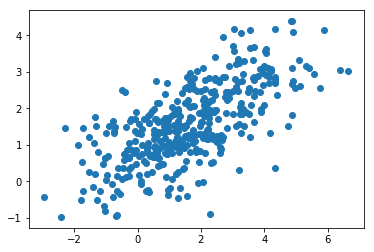

In [16]:
plt.scatter(y_test, y_pred)